# 회귀(Regression)
- 예측할 값(Target)이 연속형(continuous) 데이터인 지도학습(Supervised Learning)

## 회귀의 주요 평가 지표
- ### MSE(Mean Squard Error)
    - 실제 값과 예측값의 차의 제곱 평균
    - scikit-learn 평가함수: mean_squared_error()
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$

- ### RMSE(Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다 MSE의 제곱근이 RMSE이다
    - mean_squared_error()의 squared = False로 설정해서 계산. 또는 MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- ### $R^2$ (R square, 결정계수)
    - 결정계수는 회귀모델에서 Feature(독립변수)들이 Target(종속변수)를 얼마나 설명하는지를 나타내는 평가지표
        - 평균으로 예측했을 때 오차(총오차)보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값을 계산
        - 모델은 feature들을 이용해 값을 추론하며 그성능은 target에 대한 설명력으로 생각할 수 있다
    - 1의 가까울수록 좋은 모델
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}\\
    R^2 = 1 - \cfrac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$
    - $y_i$ : i번째 정답 값, 
    - $\hat{y_i}$ : i 번째 예측 값, 
    - $\bar{y}$ : y의 평균  


## 예제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

### Dataset 생성
- make_xxxx() 함수
    - 머신러닝 학습을 위한 dummy dataset 구현 함수
    - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성
- make_regression(): 회귀 문제를 위한 dummy dataset 생성
- make_classification(): 분류 문제를 위한 dummy datast 생성

In [2]:
X, y = make_regression(n_samples = 1000,
                       n_features = 1, 
                       n_informative = 1, 
                       noise = 30, 
                       random_state = 0
                       )

print(X.shape, y.shape)

(1000, 1) (1000,)


In [3]:
print(X[:5])
print(y[:5])

[[-2.55298982]
 [ 1.76405235]
 [-1.79132755]
 [-1.2140774 ]
 [-1.4449402 ]]
[-226.98542474  165.24959267 -110.53873999  -83.35797108 -125.77525151]


> #### **Noise란**
>
> 같은 Feature를 가진 데이터 포인트가 다른 label을 가지는 이유를 Noise라 한다. 그 이유는 현재 상태에선 모른다. 그래서 데이터를 수집하고 전처리 할 때 그 이유가 되는 Feature를 찾아야 한다. 찾으면 성능이 올라가는 것이고 못찾으면 모르는 이유가 되어 모델 성능이 떨어진다

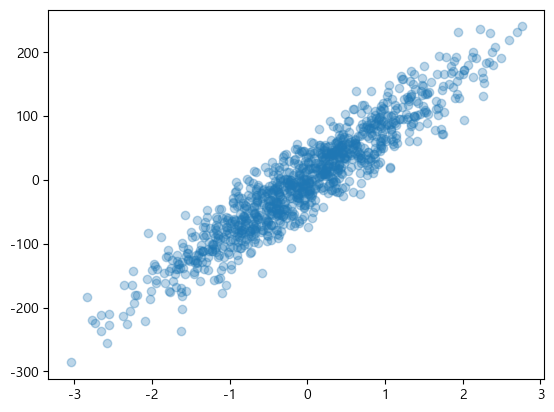

In [5]:
plt.scatter(X, y, alpha = 0.3)
plt.show()

In [6]:
# y의 정보
print(y.mean(), np.median(y))
print(y.min(), y.max())

-2.9353214065211493 -3.859887443278972
-286.10570741064424 240.32028057363925


### 모델 생성, 학습

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

### 평가

In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pred = lr.predict(X)
mse = mean_squared_error(y, pred)
rmse = mean_squared_error(y, pred, squared = False)
r2 = r2_score(y, pred)
mae = mean_absolute_error(y, pred)

print(f"MSE: {mse},\nRMSE: {rmse}, RMSE2: {np.sqrt(mse)},\nR2:{r2},\nMAE:{mae}")

MSE: 885.9735841406376,
RMSE: 29.765308399891268, RMSE2: 29.765308399891268,
R2:0.8808989693851077,
MAE:23.62777143027586


### 교차검증 (cross validation)

In [10]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(LinearRegression(), X, y, cv = 4)

print(result)
print(result.mean())

[0.89476539 0.85829536 0.88648045 0.88280056]
0.8805854394305846


In [11]:
result2 = cross_val_score(LinearRegression(), X, y, cv = 4,
                          scoring = 'neg_mean_absolute_error')
print(-result2)
print(-result2.mean())

[21.98313529 25.75860229 23.54541203 23.38231982]
23.667367357979494


### 모델이 찾은 계수(coef, 가중치: weight)와 절편(intercept, 편향: bias) 조회
- LinearRegression 모델은 선형 방정식을 이용해 예측값을 추론
- 학습이 끝나면 모델이 찾은 각 Feature에 곱해주는 계수와 절편을 다음 attribute로 조회 가능
    - coef_: Feature에 곱하는 가중치
    - intercept_: y절편. 모든 Feature가 0일때 예측값

In [12]:
lr.coef_

array([82.01323352])

In [13]:
lr.intercept_

0.7763275132894458

In [14]:
lr.predict(X[:3])

array([-208.60262243,  145.45196451, -146.136237  ])

In [15]:
lr.coef_[0] * X[:3] + lr.intercept_

array([[-208.60262243],
       [ 145.45196451],
       [-146.136237  ]])

### X, y와 추론결과 시각화

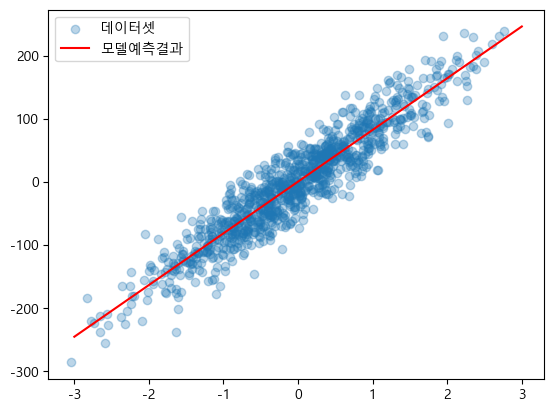

In [16]:
plt.scatter(X, y, alpha = 0.3, label = '데이터셋')
X_sample = np.linspace(-3, 3, 100)
y_sample = lr.predict(X_sample.reshape(-1, 1))
plt.plot(X_sample, y_sample, color = 'red', label = '모델예측결과')

plt.legend()
plt.show()

In [17]:
from metrics import print_metrics_regression as pmr
pmr(y, pred, '예제')

예제
MSE:885.974, RMSE: 29.765, MAE: 23.628, r2: 0.881


## 기존 분류 모델의 회귀 모델
### import

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from metrics import print_metrics_regression as pmr

from graphviz import Source

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((800, 1), (200, 1))

### 모델들 생성

In [23]:
knn = KNeighborsRegressor(n_neighbors = 5)
tree = DecisionTreeRegressor(max_depth = 3, random_state = 0)
rf = RandomForestRegressor(n_estimators = 200, max_depth = 3, random_state = 0)
gb = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 0)
lr = LinearRegression()
xgb = XGBRegressor(n_estimators = 200, max_depth = 1, random_state = 0)
svr = SVR()

estimators = [
    ('knn', knn),
    ('Decision Tree', tree),
    ('Random Forest', rf),
    ('Gradient Boosting', gb),
    ('Linear Regression', lr),
    ('XGBoost', xgb),
    ('SVM', svr)
]

### 모델 학습 및 평가

In [24]:
for model_name, model in estimators:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    pmr(y_train, pred_train, f'{model_name} - Train set')
    print('-'*50)
    pmr(y_test, pred_test, f'{model_name} - Test set')
    print('='*50)

knn - Train set
MSE:727.004, RMSE: 26.963, MAE: 21.508, r2: 0.905
--------------------------------------------------
knn - Test set
MSE:1078.201, RMSE: 32.836, MAE: 26.177, r2: 0.832
Decision Tree - Train set
MSE:999.747, RMSE: 31.619, MAE: 25.606, r2: 0.870
--------------------------------------------------
Decision Tree - Test set
MSE:1057.638, RMSE: 32.521, MAE: 26.122, r2: 0.835
Random Forest - Train set
MSE:871.589, RMSE: 29.523, MAE: 23.695, r2: 0.886
--------------------------------------------------
Random Forest - Test set
MSE:913.618, RMSE: 30.226, MAE: 24.430, r2: 0.857
Gradient Boosting - Train set
MSE:808.368, RMSE: 28.432, MAE: 22.647, r2: 0.895
--------------------------------------------------
Gradient Boosting - Test set
MSE:876.818, RMSE: 29.611, MAE: 23.993, r2: 0.863
Linear Regression - Train set
MSE:899.611, RMSE: 29.994, MAE: 23.768, r2: 0.883
--------------------------------------------------
Linear Regression - Test set
MSE:832.134, RMSE: 28.847, MAE: 23.048, r2

### Voting
- VotingRegressor
    - 각 모델이 예측한 값의 평균을 출력한다

In [25]:
estimators = [
    ('knn', knn), 
    ('Decision Tree', tree),
    ('Random Forest', rf),
    ('Gradient Boosting', gb),
    ('Linear Regression', lr),
    ('XGBoost', xgb)
]

voting = VotingRegressor(estimators)
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('knn', KNeighborsRegressor()),
                            ('Decision Tree',
                             DecisionTreeRegressor(max_depth=3,
                                                   random_state=0)),
                            ('Random Forest',
                             RandomForestRegressor(max_depth=3,
                                                   n_estimators=200,
                                                   random_state=0)),
                            ('Gradient Boosting',
                             GradientBoostingRegressor(max_depth=1,
                                                       n_estimators=200,
                                                       random_state=0)),
                            ('Linear Regression', LinearRegression()),
                            ('XGBoost...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
          

In [26]:
pred_train2 = voting.predict(X_train)
pred_test2 = voting.predict(X_test)
pmr(y_train, pred_train2)
print('-'*50)
pmr(y_test, pred_test2)

MSE:799.747, RMSE: 28.280, MAE: 22.715, r2: 0.896
--------------------------------------------------
MSE:892.207, RMSE: 29.870, MAE: 24.086, r2: 0.861


### DecisionTreeRegressor Tree 시각화

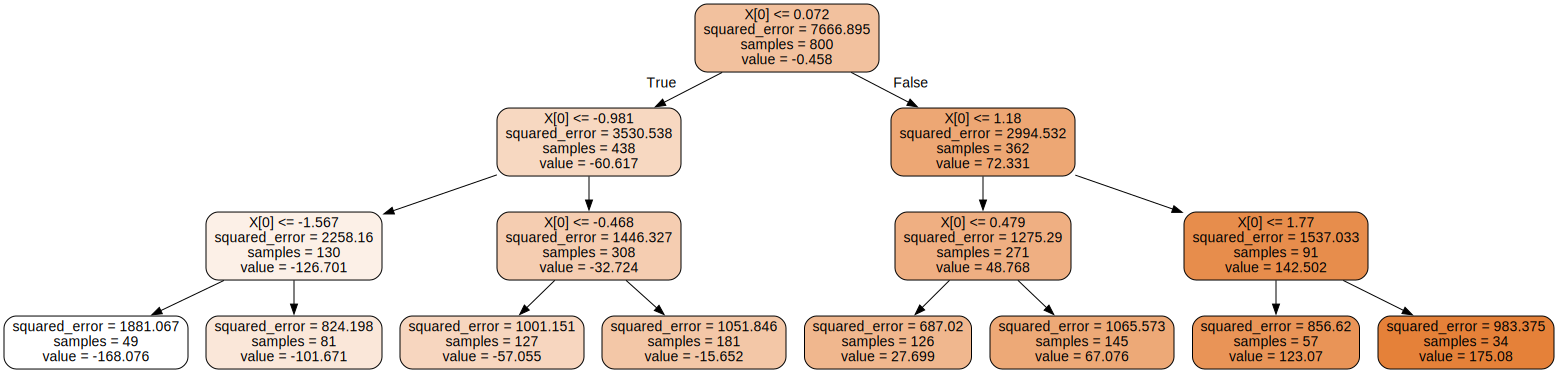

In [27]:
graph = Source(export_graphviz(tree, rounded = True, filled = True))
graph